# Звіт з практичної роботи №8

Виконав студент групи КН-24-1 Озівський В. В.

Тема: Жадібні алгоритми. Наближене розв’язання екстремальних задач
\
Мета: набути практичних навичок застосування деяких жадібних алгоритмів для розв’язання екстремальних задач.

### <center>Хід роботи</center>

#### Алгоритм грубої сили

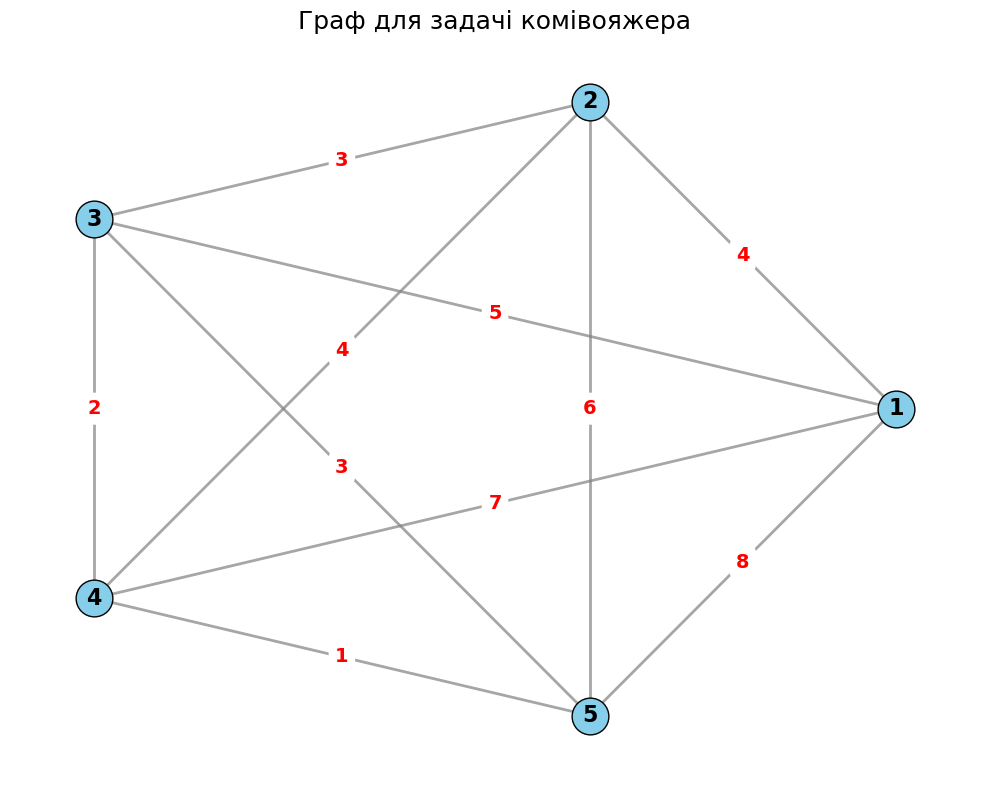

Найкоротший шлях: [1, 2, 4, 5, 3, 1]
Довжина найкоротшого шляху: 17


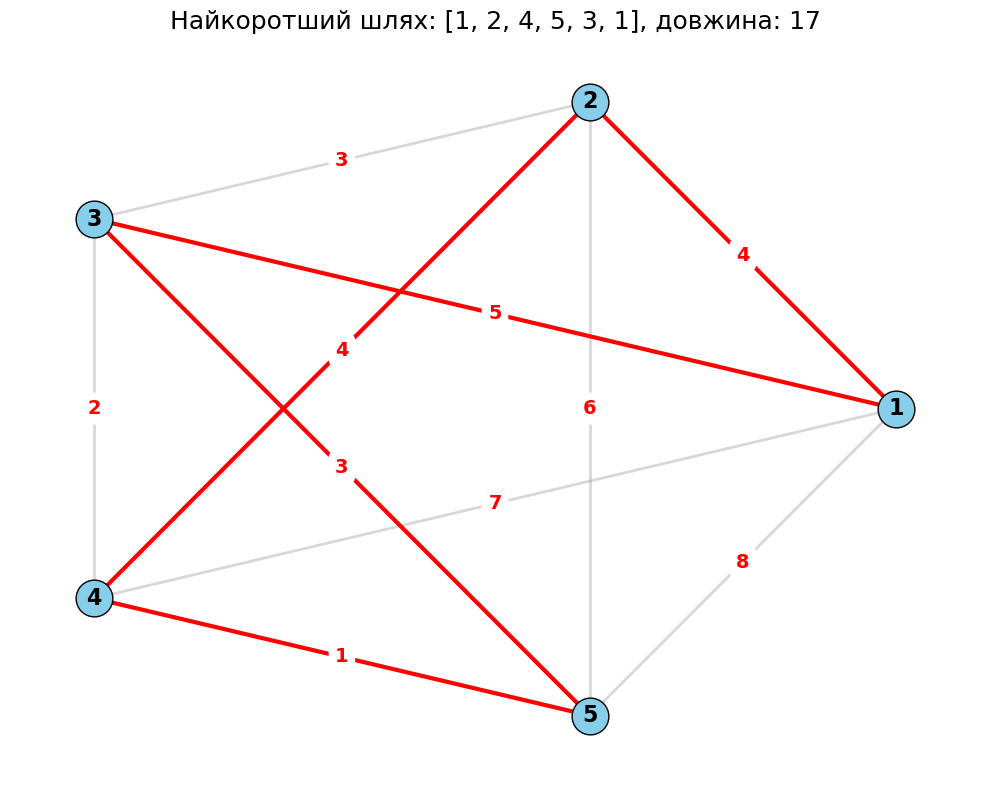

In [24]:
from itertools import permutations
import networkx as nx
import matplotlib.pyplot as plt

# Константа, яка подає нескінченність
INFINITY = pow(10, 20)

# Функція для обчислення довжини шляху
def get_path_length(G, path):
    path_length = 0
    # Проглядаємо усі вершини шляху
    for i in range(len(path)):
        # Знаходимо наступну вершину у шляху
        v1 = path[i]
        v2 = path[(i + 1) % len(path)]
        # Перевіряємо, чи існує ребро між поточною та наступною вершиною
        if not G.has_edge(v1, v2):
            # Якщо ребра не існує, повертаємо нескінченність
            return INFINITY
        # Додаємо вагу ребра до довжини шляху
        path_length += G[v1][v2]["weight"]
    return path_length

# Функція, яка генерує всі можливі перестановки вершин графа, починаючи із заданої вершини
def node_permutations(G, init_node):
    nodes = list(G.nodes())
    nodes.remove(init_node)
    # Генеруємо всі можливі перестановки залишкових вершин
    return [[init_node] + list(perm) + [init_node] for perm in permutations(nodes)]

# Головна функція для розв'язання задачі комівояжера за допомогою перебору всіх можливих шляхів
def TSP_BruteForce(G, init_node):
    min_path = None
    min_path_length = INFINITY
    # Перебираємо всі можливі шляхи із заданою початковою вершиною
    for path in node_permutations(G, init_node):
        # Обчислюємо довжину поточного шляху (без останньої вершини, бо вона така ж, як перша)
        path_length = get_path_length(G, path[:-1])
        # Порівнюємо довжину поточного шляху з мінімальною довжиною
        if path_length < min_path_length:
            min_path = path
            min_path_length = path_length
    # Повертаємо найкоротший шлях та його довжину
    return min_path, min_path_length

# Створення та візуалізація графа
def create_and_visualize_graph():
    # Задаємо дані графа
    edges = [(1, 2, 4), (1, 3, 5), (1, 4, 7), (1, 5, 8),
             (2, 3, 3), (2, 4, 4), (2, 5, 6),
             (3, 4, 2), (3, 5, 3),
             (4, 5, 1)]
    
    # Створюємо граф
    G = nx.Graph()
    
    # Додаємо ребра з вагами
    for i, j, weight in edges:
        G.add_edge(i, j, weight=weight)
    
    # Створюємо словник ваг (використовується для відображення на графіку)
    edge_labels = {(i, j): weight for i, j, weight in edges}
    
    # Створюємо позиції вузлів для більш естетичного розташування
    # Використовуємо циркулярне розташування
    pos = nx.circular_layout(G)
    
    # Задаємо розмір рисунка
    plt.figure(figsize=(10, 8))
    
    # Малюємо вузли
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', edgecolors='black')
    
    # Малюємо ребра
    nx.draw_networkx_edges(G, pos, width=2, edge_color='gray', alpha=0.7)
    
    # Додаємо підписи до вузлів
    nx.draw_networkx_labels(G, pos, font_size=16, font_weight='bold')
    
    # Додаємо підписи до ребер (ваги)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=14, font_color='red',
                                font_weight='bold', rotate=False)
    
    # Видаляємо осі
    plt.axis('off')
    
    # Додаємо заголовок
    plt.title('Граф для задачі комівояжера', fontsize=18)
    
    # Показуємо графік
    plt.tight_layout()
    plt.show()
    
    return G, pos  # Повертаємо також позиції вузлів

# Демонстрація роботи
if __name__ == "__main__":
    # Створюємо граф і візуалізуємо його
    G, pos = create_and_visualize_graph()
    
    # Вирішуємо задачу комівояжера, починаючи з вершини 1
    init_node = 1
    min_path, min_path_length = TSP_BruteForce(G, init_node)
    
    print(f"Найкоротший шлях: {min_path}")
    print(f"Довжина найкоротшого шляху: {min_path_length}")
    
    # Візуалізація найкоротшого шляху
    plt.figure(figsize=(10, 8))
    
    # Малюємо вузли
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', edgecolors='black')
    
    # Малюємо всі ребра (сірим кольором)
    all_edges = [(u, v) for (u, v, d) in G.edges(data=True)]
    nx.draw_networkx_edges(G, pos, edgelist=all_edges, width=2, edge_color='gray', alpha=0.3)
    
    # Ребра найкоротшого шляху (червоним кольором)
    path_edges = [(min_path[i], min_path[i+1]) for i in range(len(min_path)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=3, edge_color='red', alpha=1.0)
    
    # Додаємо підписи до вузлів
    nx.draw_networkx_labels(G, pos, font_size=16, font_weight='bold')
    
    # Створюємо словник ваг для відображення
    edge_labels = dict([((u, v,), d['weight']) for u, v, d in G.edges(data=True)])
    
    # Додаємо підписи до ребер (ваги)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=14, font_color='red',
                                font_weight='bold', rotate=False)
    
    # Видаляємо осі
    plt.axis('off')
    
    # Додаємо заголовок
    plt.title(f"Найкоротший шлях: {min_path}, довжина: {min_path_length}", fontsize=18)
    
    # Показуємо графік
    plt.tight_layout()
    plt.show()

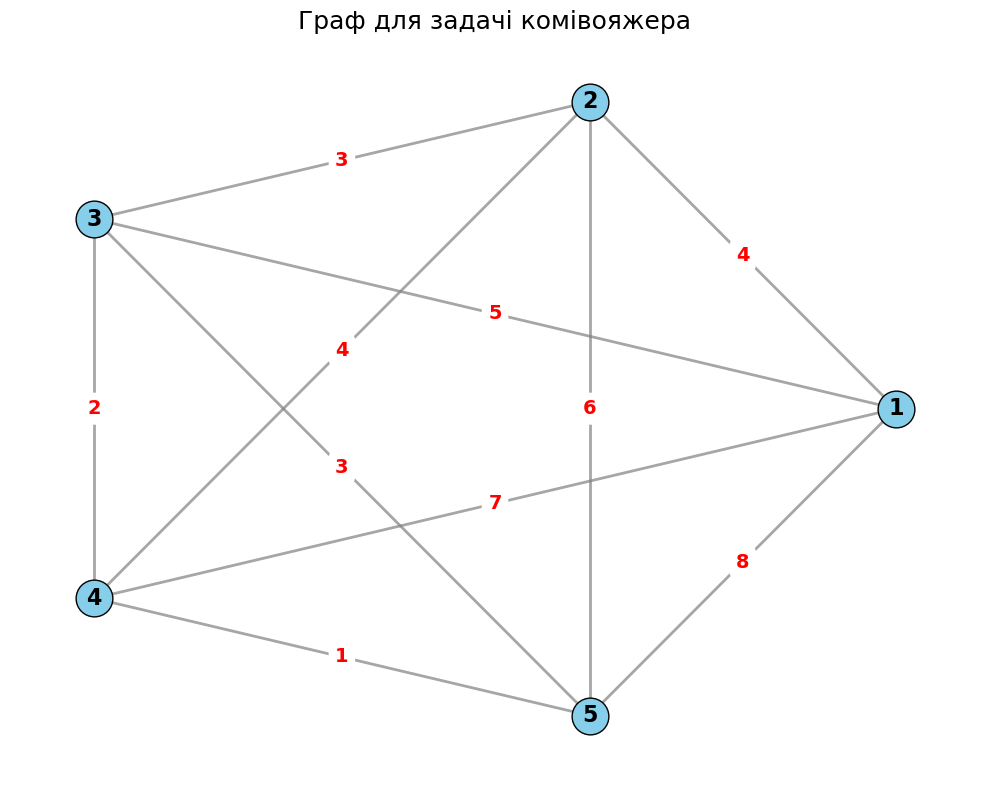

Знайдений шлях: [1, 2, 3, 4, 5, 1]
Довжина знайденого шляху: 18


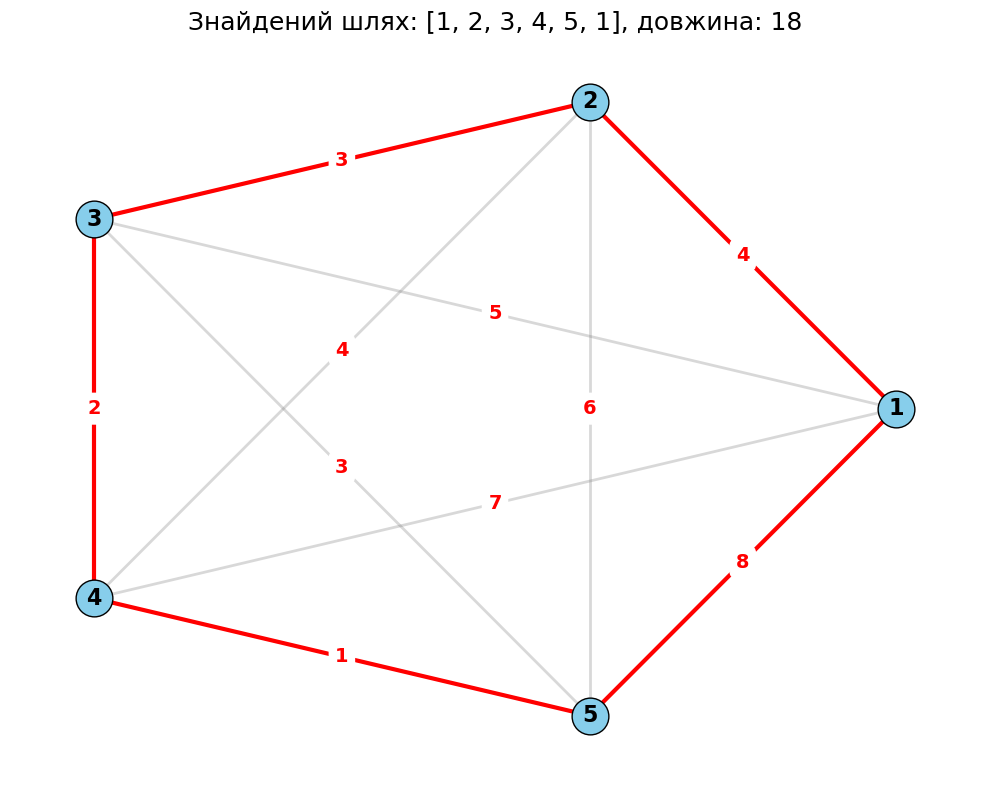

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

# Константа, яка подає нескінченність
INFINITY = float('inf')

# Функція для обчислення довжини шляху
def get_path_length(G, path):
    path_length = 0
    for i in range(len(path) - 1):  # Виправлено: тепер рахуємо тільки до передостаннього елемента
        v1 = path[i]
        v2 = path[i + 1]
        if not G.has_edge(v1, v2):
            return INFINITY
        path_length += G[v1][v2]["weight"]
    return path_length

# Алгоритм найближчого сусіда для задачі комівояжера
def TSP_NearestNeighbor(G, init_node):
    N = len(G.nodes())
    visited = {node: False for node in G.nodes()}
    tour = [init_node]
    visited[init_node] = True
    current_node = init_node

    # Вибираємо N-1 наступних вершин
    for _ in range(N - 1):
        min_distance = INFINITY
        next_node = None

        # Перевіряємо всі невідвідані вершини
        for node in G.nodes():
            if not visited[node] and node != current_node:
                # Перевіряємо, чи є ребро між поточною вершиною та кандидатом
                if G.has_edge(current_node, node):
                    distance = G[current_node][node]["weight"]
                    if distance < min_distance:
                        min_distance = distance
                        next_node = node

        if next_node is None:
            return None, INFINITY  # Неможливо знайти наступну вершину

        tour.append(next_node)
        visited[next_node] = True
        current_node = next_node

    # Додаємо початкову вершину для замикання циклу
    if not G.has_edge(current_node, init_node):
        return None, INFINITY  # Неможливо повернутися до початкової вершини
    tour.append(init_node)

    # Обчислюємо довжину шляху з виправленою функцією
    path_length = get_path_length(G, tour)
    return tour, path_length

# Створення та візуалізація графа
def create_and_visualize_graph():
    edges = [(1, 2, 4), (1, 3, 5), (1, 4, 7), (1, 5, 8),
             (2, 3, 3), (2, 4, 4), (2, 5, 6),
             (3, 4, 2), (3, 5, 3),
             (4, 5, 1)]

    # Створюємо граф
    G = nx.Graph()
    for i, j, weight in edges:
        G.add_edge(i, j, weight=weight)

    # Створюємо словник ваг
    edge_labels = {(i, j): weight for i, j, weight in edges}

    # Використовуємо циркулярне розташування
    pos = nx.circular_layout(G)

    # Задаємо розмір рисунка
    plt.figure(figsize=(10, 8))

    # Малюємо вузли
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', edgecolors='black')

    # Малюємо ребра
    nx.draw_networkx_edges(G, pos, width=2, edge_color='gray', alpha=0.7)

    # Додаємо підписи до вузлів
    nx.draw_networkx_labels(G, pos, font_size=16, font_weight='bold')

    # Додаємо підписи до ребер (ваги)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=14, font_color='red',
                                 font_weight='bold', rotate=False)

    # Видаляємо осі
    plt.axis('off')

    # Додаємо заголовок
    plt.title('Граф для задачі комівояжера', fontsize=18)

    # Показуємо графік
    plt.tight_layout()
    plt.show()

    return G, pos

# Демонстрація роботи
if __name__ == "__main__":
    # Створюємо граф і візуалізуємо його
    G, pos = create_and_visualize_graph()

    # Вирішуємо задачу комівояжера, починаючи з вершини 1
    init_node = 1
    min_path, min_path_length = TSP_NearestNeighbor(G, init_node)

    if min_path is None:
        print("Неможливо знайти гамільтонів цикл")
    else:
        print(f"Знайдений шлях: {min_path}")
        print(f"Довжина знайденого шляху: {min_path_length}")

        # Візуалізація знайденого шляху
        plt.figure(figsize=(10, 8))

        # Малюємо вузли
        nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', edgecolors='black')

        # Малюємо всі ребра (сірим кольором)
        all_edges = [(u, v) for (u, v, d) in G.edges(data=True)]
        nx.draw_networkx_edges(G, pos, edgelist=all_edges, width=2, edge_color='gray', alpha=0.3)

        # Ребра знайденого шляху (червоним кольором)
        path_edges = [(min_path[i], min_path[i+1]) for i in range(len(min_path)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=3, edge_color='red', alpha=1.0)

        # Додаємо підписи до вузлів
        nx.draw_networkx_labels(G, pos, font_size=16, font_weight='bold')

        # Створюємо словник ваг для відображення
        edge_labels = dict([((u, v,), d['weight']) for u, v, d in G.edges(data=True)])

        # Додаємо підписи до ребер (ваги)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=14, font_color='red',
                                     font_weight='bold', rotate=False)

        # Видаляємо осі
        plt.axis('off')

        # Додаємо заголовок з точним значенням довжини шляху
        plt.title(f"Знайдений шлях: {min_path}, довжина: {min_path_length}", fontsize=18)

        # Показуємо графік
        plt.tight_layout()
        plt.show()

#### Обґрунтування асимптотики алгоритмів

1. Алгоритм "Груба сила" - $O(n!)$

- Перебираємо всі можливі перестановки вершин (без фіксованої початкової) - це $(n-1)!$ варіантів
- Обчислення довжини кожного шляху вимагає $O(n)$ операцій
- Отже, загальна складність: $O(n · (n-1)!) = O(n!)$

2. Алгоритм "Найближчий сусід" - $O(n² · log n)$

- Виконуємо $n-1$ ітерацій для вибору наступних вершин
- На кожній ітерації шукаємо найближчу невідвідану вершину:
  - При використанні пріоритетної черги: $O(n log n)$ операцій
  - (Пошук серед $n$ вершин з оновленням черги - $log n$ операцій)
- Загальна складність: $O(n) × O(n log n) = O(n² · log n)$

### Відповіді на контрольні питання


1. Що таке жадібний алгоритм?
\
Алгоритм, який на кожному кроці обирає локально оптимальний варіант, сподіваючись отримати глобально оптимальне рішення.

2. Головні принципи роботи жадібних алгоритмів:
   - Покрокове прийняття рішень
   - Вибір локально оптимального варіанту на кожному кроці
   - Відсутність перегляду попередніх рішень
   - Простота реалізації

3. Головна відмінність між жадібними алгоритмами та динамічним програмуванням:
\
Жадібні алгоритми приймають одне рішення без перегляду, а динамічне програмування розглядає всі можливі підзадачі й зберігає їх результати для знаходження оптимального рішення.

4. Приклади задач для жадібних алгоритмів:
   - Задача про найкоротший шлях (алгоритм Дейкстри)
   - Побудова мінімального кістякового дерева (алгоритми Крускала, Прима)
   - Задача про розклад завдань з дедлайнами
   - Кодування Хаффмана
   - Задача про розмін монет (для деяких систем валют)

5. Обмеження жадібних алгоритмів:
   - Не завжди знаходять глобальний оптимум
   - Потребують доведення коректності для кожної задачі
   - Не підходять для задач із взаємозалежними підзадачами
   - Часто дають неоптимальні результати для NP-повних задач

6. Причини використання жадібних алгоритмів для наближеного розв'язання:
   - Висока швидкість роботи (часто $O(n log n)$ або краще)
   - Простота реалізації
   - Достатньо хороші наближені рішення для багатьох практичних задач
   - Для деяких NP-складних задач доведено гарантовану якість наближення